### grp

# Course: _Deep Learning in Python_:
1.  deep learning and neural network basics
2.  neural network optimization via backward propagation
3.  deep learning models via keras (https://keras.io/)
4.  tuning keras models

-  https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html
-  https://ml-cheatsheet.readthedocs.io/en/latest/nn_concepts.html
-  https://ml-cheatsheet.readthedocs.io/en/latest/forwardpropagation.html
-  https://ml-cheatsheet.readthedocs.io/en/latest/backpropagation.html
-  https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html

## _1. Basics of Deep Learning and Neural Networks:_
-  DL models capture interactions among features via DL functions
-  High Level Architecture:
    -  **Input Layer** => represents predictive features
    -  **Hidden Layer(s)** => represents aggregation from input data to capture interactions among input layer features
    -  **Output Layer** => represents target value predictions
-  Forward Propagation:
    -  passes feature information through network to make prediction in output layer
    -  follows a multiply add process like the dot product
    -  performs forward propagation for one data point at a time
    -  output is the prediction for the specific data point
    -  lines connect input node to hidden node w/ associated **_weight_** indicating how strongly input affects target hidden node
    -  weights => **parameters that are tweaked when fitting neural network model to training dataset**
-  Activation Functions:
    -  essential for neural network ability of predictive power
    -  **allows model to capture nonlinearity relationships within data**
    -  function applied to node inputs to produce node output for each node
    -  ReLU (rectified linear activation)
-  Multiple Hidden Layers:
    -  **deep networks interally learn and build representations of patterns in the data**
    -  **neueral network receives weights that find relevant patterns in the data to make better predictions**'
    -  model training process sets weights accordingly to optimize predictive accuracy
    -  the last layers capture the most complex interactions

#### forward propagation

In [1]:
import numpy as np

input_data = np.array([3, 5])
print(input_data)
print("="*10)

weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}
print(weights)
print("="*10)

node_0_value = (input_data * weights["node_0"]).sum()
print(node_0_value) # (3 * 2) + (5 * 4) = 26
print("="*10)

node_1_value = (input_data * weights["node_1"]).sum()
print(node_1_value) # (3 * 4) + (5 * -5) = -13
print("="*10)

hidden_layer_outputs = np.array([node_0_value, node_1_value])
print(hidden_layer_outputs)
print("="*10)

output = (hidden_layer_outputs * weights["output"]).sum()
print(output) # (26 * 2) + (-13 * 7) = -39

[3 5]
{'node_0': array([2, 4]), 'node_1': array([ 4, -5]), 'output': array([2, 7])}
26
-13
[ 26 -13]
-39


#### ReLU

In [2]:
input_data = np.array([3, 5])
weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}

def relu(input):
    '''
    Define your relu activation function here
    This function takes a single number as an input,
    returning 0 if the input is negative,
    and the input if the input is positive
    '''
    output = max(0, input)
    return(output)

node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)
print(node_0_input) # (3 * 2) + (5 * 4) = 26
print(node_0_output) # max(0, 26) => 26
print("="*10)

node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)
print(node_1_input) # (3 * 4) + (5 * -5) = -13
print(node_1_output) # max(0, -13) => 0
print("="*10)

hidden_layer_outputs = np.array([node_0_output, node_1_output])
print(hidden_layer_outputs)
print("="*10)

model_output = (hidden_layer_outputs * weights['output']).sum()
print(model_output) # (26 * 2) + (0 * 7) = 52

26
26
-13
0
[26  0]
52


#### apply predictions

In [3]:
new_data = [np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]
weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}

def predict_with_network_single_layer(input_data_row, weights):

    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    return(model_output)

results = [] # store predicted results in empty list
for i in new_data:
    results.append(predict_with_network_single_layer(i, weights)) # append prediction to results

print(results)

[52, 63, 0, 148]


#### multi-layer neural network

In [4]:
input_data = np.array([3, 5])
weights = {'node_0_0': np.array([2, 4]),
 'node_0_1': np.array([ 4, -5]),
 'node_1_0': np.array([-1,  2]),
 'node_1_1': np.array([1, 2]),
 'output': np.array([2, 7])}

def predict_with_network_multi_layers(input_data):
    node_0_0_input = (input_data * weights['node_0_0']).sum() # (3 * 2) + (5 * 4) = 26
    node_0_0_output = relu(node_0_0_input) # max(0, 26) => 26
    print(node_0_0_input)
    print(node_0_0_output)
    print("="*10)
    
    node_0_1_input = (input_data * weights['node_0_1']).sum() # (3 * 4) + (5 * -5) = -13
    node_0_1_output = relu(node_0_1_input) # max(0, -13) => 0
    print(node_0_1_input)
    print(node_0_1_output)
    print("="*10)

    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output]) # [26, -13]
    print(hidden_0_outputs)
    print("="*10)
    
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum() # (26 * -1) + (0 * 2) = -26
    node_1_0_output = relu(node_1_0_input) # max(0, -26) => 0
    print(node_1_0_input)
    print(node_1_0_output)
    print("="*10)
    
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum() # (0 * 2) + (26 * 1) = 26
    node_1_1_output = relu(node_1_1_input) # max(0, 26) => 26
    print(node_1_1_input)
    print(node_1_1_output)
    print("="*10)

    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output]) # [0, 26]
    print(hidden_1_outputs)
    print("="*10)

    model_output = (hidden_1_outputs * weights['output']).sum() # (0 * 2) + (26 * 7) = 182
    
    return(model_output)

output = predict_with_network_multi_layers(input_data)
print(output)

26
26
-13
0
[26  0]
-26
0
26
26
[ 0 26]
182


## _2. Optimizing a Neural Network with Backward Propagation:_
-  Loss Function:
    -  aggregates errors in predictions from many data points into a single number
    -  **measure of model's predictive performance**
    -  lower loss function value means a better model
    -  error => [predicted value - actual value]
-  Gradient Descent "array of slopes":
    -  **Slope** => describes the direction and steepness of the line
    -  goal is to find weights that give the lowest value for the loss function
    -  good to visualize slope descent via 2D plot => **_X axis (weight); Y axis (loss function)_**
    -  High Level Process => _start at a random point and find slope (**derivative**) then take a step downhill until reaching optimal weight value_:
        -  goal is to reach the minimum value of the slope curve via a flattened surface on the curve
        -  to avoid too big of a step use the _**learning rate**_ * _**slope**_ to reach optimal weight value
    -  **How to Calculate Slope for each data point/weight?** Ex - fed layer node (3) => weight (2) => output layer node prediction (6); actual target value (10):
        -  **Slope of the loss function with respect to the value at the node feeding into:**
            -  2 * (predicted value - actual value) = 2 * Error ... 2 * -4
        -  **The value of the node that feeds into the weight:**
            -  3
            -  slope => 2 * -4 * 3 = -24
            -  apply learning rate = 0.01
            -  **new weight value => 2 - 0.01 * (-24) = 2.24**
        -  The slope of the activation function with respect to the value feeding into:
            -  ReLU => slope of 1 if positive; slope of 0 if negative
-  Backpropagation:
    -  calculates shopes to optimize more complex deep learning models
    -  takes error from output layer backwards through hidden layers towards input layer
    -  **trying to estimate the slope of the loss function with respect to each weight**
    -  **Calculation process** Ex - output layer node prediction (7); actual target value (4) <= weights [1, 2] <= fed layer nodes [1, 3]:
        -  Node value feeding into weight:
            -  [1, 3]
        -  Slope of loss function with respect to the node it feeds into:
            -  loss function slope => 2 * 3 [error => 7-4] = 6
        -  Slope of activation function at the node it feeds into:
            -  top weight s1ope => 1 * 6 * 1 = 6
            -  bottom weight slope => 3 * 6 * 1 = 18
        -  **Hidden Layer Backpropagation** Ex - node output from previous forward layer [6]; weight [0], fed node weight [0]:
            -  Value at the node feeding into the weight => 0
            -  The slope of the activation function for the node being fed into => 0 if ReLU
            -  The slope of the loss function with respect to the output node => 6
            -  Slope => 0 * 0 * 6 = 0
-  Forward / Backward Propagation Steps:
    1.  start at random set of weights
    2.  use forward propagation to make prediction
    3.  use backward propagation to calculate slope of loss function with respect to each weight
    4.  multiply slope by learning rate and subtract from current weight to get optimal adjusted weight
    5.  continue this process until a flat value is determined
-  Stochastic Gradient Descent "batch gradient descent":
    -  calculate slopes on only subset of the data aka batch
    -  use a different batch of data to calculate the next update
    -  complete the process all over again once all data is used
-  Epoch:
    -  **each time running through the entire training dataset**

#### weight changes test

In [5]:
input_data = np.array([0, 3])

weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

target_actual = 3

model_output_0 = predict_with_network_single_layer(input_data, weights_0)
error_0 = model_output_0 - target_actual # predicted minus actual

# create weights that cause the network to make perfect prediction => 3
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 0],
             'output': [1, 1]
            }

model_output_1 = predict_with_network_single_layer(input_data, weights_1)
error_1 = model_output_1 - target_actual # predicted minus actual

print(error_0)
print(error_1) # perfect prediction

6
0


#### mse

In [6]:
from sklearn.metrics import mean_squared_error

input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]
target_actuals = [1, 3, 5, 7]
weights_0 = {'node_0': np.array([2, 1]), 'node_1': np.array([1, 2]), 'output': np.array([1, 1])} # model 0
weights_1 = {'node_0': np.array([2, 1]), 'node_1': np.array([1. , 1.5]), 'output': np.array([1. , 1.5])} # model 1

model_output_0 = [] # empty list for model 0 prediction values
model_output_1 = [] # empty list for model 1 prediction values

for row in input_data: # iterate over each row of input_data
    model_output_0.append(predict_with_network_single_layer(row, weights_0))
    model_output_1.append(predict_with_network_single_layer(row, weights_1))

mse_0 = mean_squared_error(target_actuals, model_output_0)
mse_1 = mean_squared_error(target_actuals, model_output_1)

print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


#### calculate slope

In [7]:
weights = np.array([0, 2, 1])
input_data = np.array([1, 2, 3])
target = 0

preds = (weights * input_data).sum()
print(preds)
print("="*10)

error = target - preds
print(error)
print("="*10)

slope = 2 * input_data * error # 2 * x * (y-xb)
print(slope)

7
-7
[-14 -28 -42]


#### improve model weights

In [8]:
learning_rate = 0.01

preds = (weights * input_data).sum()
error = preds - target
slope = 2 * input_data * error

weights_updated = weights - learning_rate * slope # update weights
preds_updated = (weights_updated * input_data).sum() # updated preds
error_updated = preds_updated - target # updated error

print(error) # original error
print(error_updated) # updated error ... it decreased!

7
5.04


#### error udf

In [9]:
def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return(error)

In [10]:
import inspect
print(inspect.getsource(get_error))

def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return(error)



#### slope udf

In [11]:
def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return(slope)

In [12]:
import inspect
print(inspect.getsource(get_slope))

def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return(slope)



#### mse udf

In [13]:
def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors**2)
    return(mse)

In [14]:
import inspect
print(inspect.getsource(get_mse))

def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors**2)
    return(mse)



#### improve multiple weights

In [15]:
import matplotlib
import matplotlib.pyplot as plt

input_data = np.array([1, 2, 3])
weights = np.array([-0.49929916, 1.00140168, -0.49789747])

n_updates = 20
mse_hist = []

for i in range(n_updates): # iterate over the number of updates
    slope = get_slope(input_data, target, weights)
    weights = weights - 0.01 * slope # update weights
    mse = get_mse(input_data, target, weights)
    print(mse)
    mse_hist.append(mse)

plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

4.990700200532531e-05
2.587178983956073e-05
1.3411935852823729e-05
6.952747546105929e-06
3.604304327902831e-06
1.8684713635843904e-06
9.686155548823403e-07
5.02130303650741e-07
2.6030434941282503e-07
1.349417747356346e-07
6.995381602286371e-08
3.6264058226252544e-08
1.8799287784552644e-08
9.74555078743844e-09
5.052093528195461e-09
2.6190052850101636e-09
1.357692339744687e-09
7.038277089184618e-10
3.6486428432233195e-10
1.8914564499147536e-10


<Figure size 640x480 with 1 Axes>

## _3. Building Deep Learning Models with Keras_:
-  Model Building Steps:
    1.  Specify Architecture [# of layers, # of nodes (columns) in each layer, activation function, etc.]
    2.  Compile [loss function, optimization details (learning rate), etc.]
    3.  Fit [cycle of backpropagation/gradient descent => optimization of model weights w/ data]
    4.  Predict [make predictions (save model, reload model, apply model)]

#### regression - prepare data

In [16]:
import pandas as pd

path = '/Users/grp/Documents/BIGDATA/DATACAMP/pythonCourses/21 - deepinglearningwithpython/hourly_wages.csv'

df = pd.read_csv(path) # read csv

target = df.loc[:, "wage_per_hour"] # target var
target = target.values # convert to matrix
print(target.shape)

'''
# another way to get features cols and target col via pandas
X = df.drop(columns=['wage_per_hour']).values
y = df['wage_per_hour'].values
'''

predictors = df.drop(["wage_per_hour"], axis=1) # drop target var
predictors = predictors.values # convert to matrix
print(predictors.shape)

df.head() # original df

(534,)
(534, 9)


,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


#### step 1 => regression - specify model architecture

In [18]:
import keras
from keras.layers import Dense
from keras.models import Sequential

n_cols = predictors.shape[1] # number of cols in predictors matrix
print(n_cols)

model = Sequential()

model.add(Dense(50, activation='relu', input_shape=(n_cols,))) # 1st layer
# n_cols => (9 items in each row of data, 'any # of rows of data are acceptable as inputs') or param input_dim = 9
model.add(Dense(32, activation='relu')) # 2nd layer
model.add(Dense(1)) # output layer

9


#### step2 => regression - compile the model:
-  loss function (https://keras.io/losses/)
-  optimization (https://keras.io/optimizers/#adam)

In [19]:
# opt => adam ... industry standard; loss => industry standard for regression
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

print("Loss function: " + model.loss)

Loss function: mean_squared_error


#### step3 => regression - fit the model

In [29]:
model.fit(predictors, target)

Epoch 1/1
534/534 [==============================] - 0s 37us/step - loss: 21.3077


#### classification - prepare data

In [30]:
import pandas as pd
from keras.utils import to_categorical # OHE

path = '/Users/grp/Documents/BIGDATA/DATACAMP/pythonCourses/21 - deepinglearningwithpython/titanic_all_numeric.csv'

df = pd.read_csv(path) # read csv

target = to_categorical(df["survived"]) # 2 cols (binary); 1 or 0
print(target.shape)

predictors = df.drop(["survived"], axis=1) # drop target var
predictors = predictors.values # convert to matrix
target = to_categorical(df.survived)

print(predictors.shape)

df.head() # original df

(891, 2)
(891, 10)


,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


#### step 1 => classification - specify model architecture:
-  output layer has separate node for each possible class outcome hence use "softmax" activation

In [31]:
import keras
from keras.layers import Dense
from keras.models import Sequential

n_cols = predictors.shape[1] # number of cols in predictors matrix
print(n_cols)

model = Sequential()

model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
model.add(Dense(2, activation='softmax')) # 2 output nodes for binary target classes (1 or 0)

10


#### step2 => classification - compile the model:
-  loss function => "categorical_corssentropy" similar to "log loss" in that lower value is better (https://keras.io/losses/)
-  optimization (https://keras.io/optimizers/#sgd)

In [32]:
# opt => sgd; loss => industry standard for classification
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

#### step3 => classification - fit the model

In [44]:
model.fit(predictors, target)

Epoch 1/1
891/891 [==============================] - 0s 30us/step - loss: 0.5955 - acc: 0.7003


#### step4 => classification - make predictions:
-  save / reload / apply model

In [45]:
pred_data = np.array([[2, 34.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [2, 31.0, 1, 1, 26.25, 0, False, 0, 0, 1],
       [1, 11.0, 1, 2, 120.0, 1, False, 0, 0, 1],
       [3, 0.42, 0, 1, 8.5167, 1, False, 1, 0, 0],
       [3, 27.0, 0, 0, 6.975, 1, False, 0, 0, 1],
       [3, 31.0, 0, 0, 7.775, 1, False, 0, 0, 1],
       [1, 39.0, 0, 0, 0.0, 1, False, 0, 0, 1],
       [3, 18.0, 0, 0, 7.775, 0, False, 0, 0, 1],
       [2, 39.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [1, 33.0, 1, 0, 53.1, 0, False, 0, 0, 1],
       [3, 26.0, 0, 0, 7.8875, 1, False, 0, 0, 1],
       [3, 39.0, 0, 0, 24.15, 1, False, 0, 0, 1],
       [2, 35.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [3, 6.0, 4, 2, 31.275, 0, False, 0, 0, 1],
       [3, 30.5, 0, 0, 8.05, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 0.0, 1, True, 0, 0, 1],
       [3, 23.0, 0, 0, 7.925, 0, False, 0, 0, 1],
       [2, 31.0, 1, 1, 37.0042, 1, False, 1, 0, 0],
       [3, 43.0, 0, 0, 6.45, 1, False, 0, 0, 1],
       [3, 10.0, 3, 2, 27.9, 1, False, 0, 0, 1],
       [1, 52.0, 1, 1, 93.5, 0, False, 0, 0, 1],
       [3, 27.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [1, 38.0, 0, 0, 0.0, 1, False, 0, 0, 1],
       [3, 27.0, 0, 1, 12.475, 0, False, 0, 0, 1],
       [3, 2.0, 4, 1, 39.6875, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 6.95, 1, True, 0, 1, 0],
       [3, 29.69911764705882, 0, 0, 56.4958, 1, True, 0, 0, 1],
       [2, 1.0, 0, 2, 37.0042, 1, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 7.75, 1, True, 0, 1, 0],
       [1, 62.0, 0, 0, 80.0, 0, False, 0, 0, 0],
       [3, 15.0, 1, 0, 14.4542, 0, False, 1, 0, 0],
       [2, 0.83, 1, 1, 18.75, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.2292, 1, True, 1, 0, 0],
       [3, 23.0, 0, 0, 7.8542, 1, False, 0, 0, 1],
       [3, 18.0, 0, 0, 8.3, 1, False, 0, 0, 1],
       [1, 39.0, 1, 1, 83.1583, 0, False, 1, 0, 0],
       [3, 21.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 8.05, 1, True, 0, 0, 1],
       [3, 32.0, 0, 0, 56.4958, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 29.7, 1, True, 1, 0, 0],
       [3, 20.0, 0, 0, 7.925, 1, False, 0, 0, 1],
       [2, 16.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [1, 30.0, 0, 0, 31.0, 0, False, 1, 0, 0],
       [3, 34.5, 0, 0, 6.4375, 1, False, 1, 0, 0],
       [3, 17.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [3, 42.0, 0, 0, 7.55, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 8, 2, 69.55, 1, True, 0, 0, 1],
       [3, 35.0, 0, 0, 7.8958, 1, False, 1, 0, 0],
       [2, 28.0, 0, 1, 33.0, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 1, 0, 89.1042, 0, True, 1, 0, 0],
       [3, 4.0, 4, 2, 31.275, 1, False, 0, 0, 1],
       [3, 74.0, 0, 0, 7.775, 1, False, 0, 0, 1],
       [3, 9.0, 1, 1, 15.2458, 0, False, 1, 0, 0],
       [1, 16.0, 0, 1, 39.4, 0, False, 0, 0, 1],
       [2, 44.0, 1, 0, 26.0, 0, False, 0, 0, 1],
       [3, 18.0, 0, 1, 9.35, 0, False, 0, 0, 1],
       [1, 45.0, 1, 1, 164.8667, 0, False, 0, 0, 1],
       [1, 51.0, 0, 0, 26.55, 1, False, 0, 0, 1],
       [3, 24.0, 0, 3, 19.2583, 0, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 7.2292, 1, True, 1, 0, 0],
       [3, 41.0, 2, 0, 14.1083, 1, False, 0, 0, 1],
       [2, 21.0, 1, 0, 11.5, 1, False, 0, 0, 1],
       [1, 48.0, 0, 0, 25.9292, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 8, 2, 69.55, 0, True, 0, 0, 1],
       [2, 24.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [2, 42.0, 0, 0, 13.0, 0, False, 0, 0, 1],
       [2, 27.0, 1, 0, 13.8583, 0, False, 1, 0, 0],
       [1, 31.0, 0, 0, 50.4958, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 9.5, 1, True, 0, 0, 1],
       [3, 4.0, 1, 1, 11.1333, 1, False, 0, 0, 1],
       [3, 26.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [1, 47.0, 1, 1, 52.5542, 0, False, 0, 0, 1],
       [1, 33.0, 0, 0, 5.0, 1, False, 0, 0, 1],
       [3, 47.0, 0, 0, 9.0, 1, False, 0, 0, 1],
       [2, 28.0, 1, 0, 24.0, 0, False, 1, 0, 0],
       [3, 15.0, 0, 0, 7.225, 0, False, 1, 0, 0],
       [3, 20.0, 0, 0, 9.8458, 1, False, 0, 0, 1],
       [3, 19.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.8958, 1, True, 0, 0, 1],
       [1, 56.0, 0, 1, 83.1583, 0, False, 1, 0, 0],
       [2, 25.0, 0, 1, 26.0, 0, False, 0, 0, 1],
       [3, 33.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [3, 22.0, 0, 0, 10.5167, 0, False, 0, 0, 1],
       [2, 28.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [3, 25.0, 0, 0, 7.05, 1, False, 0, 0, 1],
       [3, 39.0, 0, 5, 29.125, 0, False, 0, 1, 0],
       [2, 27.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [1, 19.0, 0, 0, 30.0, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 1, 2, 23.45, 0, True, 0, 0, 1],
       [1, 26.0, 0, 0, 30.0, 1, False, 1, 0, 0],
       [3, 32.0, 0, 0, 7.75, 1, False, 0, 1, 0]], dtype=object)

print(pred_data.shape)

(91, 10)


In [46]:
from keras.models import load_model
import os
from os import path

if not os.path.exists('persist_models'):
        os.mkdir('persist_models')

model.save('/Users/grp/datacampNotebooks/pythonCourses/persist_models/keras_model.h5')
ann_model = load_model('/Users/grp/datacampNotebooks/pythonCourses/persist_models/keras_model.h5')     

In [47]:
! ls /Users/grp/datacampNotebooks/pythonCourses/persist_models

keras_model.h5


In [48]:
predictions = ann_model.predict(pred_data) # predict new data; output will be class [0, 1] probas
print(predictions[:10]) # class [0,1] pred probas

print("="*10)

predicted_prob_true = predictions[:,1] # filter out probas of True [i.e. = 1] classes [2nd col/index pos 1]
print(predicted_prob_true) # class = True (1) pred probas

[[0.7501191  0.24988091]
 [0.55431104 0.44568905]
 [0.3261089  0.6738911 ]
 [0.47804806 0.52195203]
 [0.8097411  0.19025898]
 [0.8247998  0.17520025]
 [0.9083324  0.09166753]
 [0.63209397 0.36790606]
 [0.788      0.21200001]
 [0.4672823  0.5327177 ]]
[0.24988091 0.44568905 0.6738911  0.52195203 0.19025898 0.17520025
 0.09166753 0.36790606 0.21200001 0.5327177  0.209872   0.306088
 0.2040975  0.5022912  0.18186449 0.11937501 0.32262376 0.5044144
 0.10174178 0.46371743 0.5789555  0.21406886 0.09541091 0.32589003
 0.48001966 0.16640602 0.514202   0.58520097 0.17635098 0.61582077
 0.47506103 0.48877853 0.2171238  0.23140137 0.27934408 0.6004549
 0.26034522 0.16639715 0.5243199  0.46129996 0.25616112 0.348135
 0.52163583 0.19058137 0.2940976  0.11517151 0.39868942 0.20560941
 0.4983697  0.61064804 0.48033163 0.03306286 0.5199829  0.553543
 0.37582904 0.33383563 0.7455716  0.33510885 0.42135727 0.2171238
 0.13508384 0.27876326 0.43768921 0.43063316 0.31834844 0.27118203
 0.4432422  0.5054476

#### model summary

In [49]:
from keras.models import load_model
ann_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 66        
Total params: 418
Trainable params: 418
Non-trainable params: 0
_________________________________________________________________


## _4. Fine-Tuning Keras Models_:
-  Stochastic Gradient Descent:
    -  uses a fixed learning rate
-  Validation Dataset:
    -  used to test model performance
    -  cross validation usually not needed because DL models train large volumns of data so validation split is efficient
-  Early Stopping:
    -  stop taining after amount of epochs stop improving model's validation loss
-  Model Capacity:
    -  model capacity is model's ability to capture predictive patterns in data
    -  **validation score is ultimate measure of a model's predictive quality**
    -  recommendation:
        -  start with a small network
        -  get the validation score
        -  keep increasing capacity (units aka nodes, layers) until validation score is no longer improving

#### changing optimization parameters [learning rate]

In [50]:
input_shape = (10,)

def get_new_model(input_shape = input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

In [51]:
import inspect
print(inspect.getsource(get_new_model))

def get_new_model(input_shape = input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)



In [54]:
from keras.optimizers import SGD

lr_to_test = [.000001, 0.01, 1]

for lr in lr_to_test: # iterate over learning rates
    print('\n\nTesting model with learning rate: %f\n'%lr )
    model = get_new_model()
    my_optimizer = SGD(lr=lr)
    model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy')
    model.fit(predictors, target)



Testing model with learning rate: 0.000001

Epoch 1/1
891/891 [==============================] - 0s 439us/step - loss: 0.8160


Testing model with learning rate: 0.010000

Epoch 1/1
891/891 [==============================] - 0s 472us/step - loss: 2.2980


Testing model with learning rate: 1.000000

Epoch 1/1
891/891 [==============================] - 0s 488us/step - loss: 9.6095


#### classification - evaluate model accuracy on validation dataset

In [56]:
n_cols = predictors.shape[1]
input_shape = (n_cols,)
print(input_shape)

model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(predictors, target, validation_split=0.3, epochs=10) # validation set is reported in each epoch

(10,)
Train on 623 samples, validate on 268 samples
Epoch 1/10
623/623 [==============================] - 1s 1ms/step - loss: 1.0869 - acc: 0.5859 - val_loss: 0.6226 - val_acc: 0.7090
Epoch 2/10
623/623 [==============================] - 0s 51us/step - loss: 0.6597 - acc: 0.6533 - val_loss: 0.6409 - val_acc: 0.7090
Epoch 3/10
623/623 [==============================] - 0s 57us/step - loss: 0.7040 - acc: 0.6517 - val_loss: 0.5373 - val_acc: 0.7313
Epoch 4/10
623/623 [==============================] - 0s 49us/step - loss: 0.6546 - acc: 0.6629 - val_loss: 0.6865 - val_acc: 0.6455
Epoch 5/10
623/623 [==============================] - 0s 52us/step - loss: 0.5981 - acc: 0.6838 - val_loss: 0.5520 - val_acc: 0.7612
Epoch 6/10
623/623 [==============================] - 0s 51us/step - loss: 0.6016 - acc: 0.7047 - val_loss: 0.5266 - val_acc: 0.7239
Epoch 7/10
623/623 [==============================] - 0s 52us/step - loss: 0.5777 - acc: 0.6950 - val_loss: 0.5362 - val_acc: 0.7313
Epoch 8/10
623/623

#### early stopping

In [58]:
from keras.callbacks import EarlyStopping

n_cols = predictors.shape[1]
input_shape = (n_cols,)
print(input_shape)

model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

# patience = stop optimization when the validation loss hasn't improved for 2 epochs
early_stopping_monitor = EarlyStopping(patience=2)

model.fit(predictors, target, validation_split=0.3, epochs=30, callbacks = [early_stopping_monitor])

(10,)
Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 1s 1ms/step - loss: 1.2280 - acc: 0.5778 - val_loss: 0.6088 - val_acc: 0.7090
Epoch 2/30
623/623 [==============================] - 0s 52us/step - loss: 0.8496 - acc: 0.6228 - val_loss: 0.5891 - val_acc: 0.7127
Epoch 3/30
623/623 [==============================] - 0s 52us/step - loss: 0.7031 - acc: 0.6324 - val_loss: 0.5170 - val_acc: 0.7500
Epoch 4/30
623/623 [==============================] - 0s 52us/step - loss: 0.6140 - acc: 0.6742 - val_loss: 0.5506 - val_acc: 0.7500
Epoch 5/30
623/623 [==============================] - 0s 50us/step - loss: 0.6062 - acc: 0.6854 - val_loss: 0.6483 - val_acc: 0.7313


#### model comparison

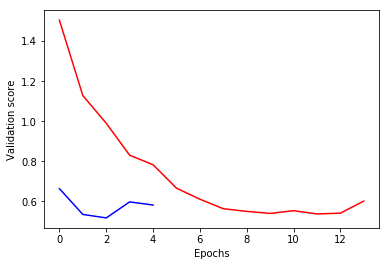

In [64]:
early_stopping_monitor = EarlyStopping(patience=2)

model_1 = Sequential() # red
model_2 = Sequential() # blue; outputs a lower log loss

model_1.add(Dense(10, activation='relu', input_shape=input_shape))
model_1.add(Dense(10, activation='relu'))

model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

model_1.add(Dense(2, activation='softmax'))
model_2.add(Dense(2, activation='softmax'))

model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

In [65]:
print(model_1.summary())
print("="*10)
print(model_2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_73 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_76 (Dense)             (None, 2)                 22        
Total params: 242
Trainable params: 242
Non-trainable params: 0
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 100)               1100      
_________________________________________________________________
dense_75 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_7

#### add layers to a network

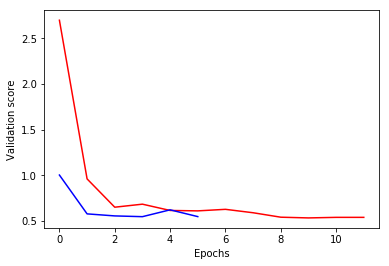

In [72]:
input_shape = (n_cols,)

model_1 = Sequential() # red
model_2 = Sequential() # blue; outputs a lower log loss

model_1.add(Dense(50, activation='relu', input_shape=input_shape))

model_2.add(Dense(50, activation='relu', input_shape = input_shape))
model_2.add(Dense(50, activation='relu', input_shape = input_shape))
model_2.add(Dense(50, activation='relu', input_shape = input_shape))

model_1.add(Dense(2, activation='softmax'))
model_2.add(Dense(2, activation='softmax'))

model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

In [73]:
print(model_1.summary())
print("="*10)
print(model_2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 50)                550       
_________________________________________________________________
dense_118 (Dense)            (None, 2)                 102       
Total params: 652
Trainable params: 652
Non-trainable params: 0
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 50)                550       
_________________________________________________________________
dense_116 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_117 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_1

#### digit recognition model:
-  GPU help => https://www.datacamp.com/community/tutorials/deep-learning-jupyter-aws

In [118]:
df = pd.read_csv("/Users/grp/Documents/BIGDATA/DATACAMP/pythonCourses/21 - deepinglearningwithpython/mnist.csv",\
                header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.61,0.611,0.612,0.613,0.614,0.615,0.616,0.617
1,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [119]:
from keras.utils import to_categorical

X = df.drop(columns=[df.columns[0]])
y = to_categorical(df[df.columns[0]])
print(X.shape) # 28 * 28 = 784 features
print(y.shape) # digit labels => 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

(2001, 784)
(2001, 10)


In [120]:
model = Sequential()

model.add(Dense(50, activation='relu', input_shape = (784,)))
model.add(Dense(25, activation='relu', input_shape = (784,)))
model.add(Dense(10, activation='softmax')) # 10 since there are 10 possible outputs [0,1,2,3,4,5,6,7,8,9]

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

early_stopping_monitor = EarlyStopping(patience=10)
# Fit the model
model.fit(X, y, epochs=100, validation_split=0.3, callbacks=[early_stopping_monitor])

Train on 1400 samples, validate on 601 samples
Epoch 1/100
1400/1400 [==============================] - 3s 2ms/step - loss: 11.6104 - acc: 0.2507 - val_loss: 10.3182 - val_acc: 0.3428
Epoch 2/100
1400/1400 [==============================] - 0s 104us/step - loss: 9.3354 - acc: 0.4007 - val_loss: 8.4637 - val_acc: 0.4509
Epoch 3/100
1400/1400 [==============================] - 0s 104us/step - loss: 8.1951 - acc: 0.4643 - val_loss: 8.0967 - val_acc: 0.4709
Epoch 4/100
1400/1400 [==============================] - 0s 105us/step - loss: 7.4587 - acc: 0.5214 - val_loss: 8.0155 - val_acc: 0.4842
Epoch 5/100
1400/1400 [==============================] - 0s 108us/step - loss: 6.9715 - acc: 0.5536 - val_loss: 6.5969 - val_acc: 0.5757
Epoch 6/100
1400/1400 [==============================] - 0s 106us/step - loss: 6.4274 - acc: 0.5800 - val_loss: 6.5221 - val_acc: 0.5774
Epoch 7/100
1400/1400 [==============================] - 0s 105us/step - loss: 5.8586 - acc: 0.6193 - val_loss: 5.6920 - val_acc: 0

### grp